In [1]:
# Note: DALL-E 3 requires version 1.0.0 of the openai-python library or later
import os
from openai import AzureOpenAI
import json
from IPython.display import Image
from urllib.request import urlretrieve

api_base = os.environ.get("AZURE_OPENAI_API_BASE", "https://api.openai.com/v1")
api_key = os.environ.get("AZURE_OPENAI_API_KEY")
api_version = os.environ.get("AZURE_OPENAI_API_VERSION", None)

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=api_base,
    api_key=api_key,
)

images_paths = []

In [2]:
from datetime import datetime
from pathlib import Path
def gen_filename():
    ts = datetime.now().strftime("%Y-%m-%d-%H:%M:%S")
    return Path(f"work/{ts}.png")

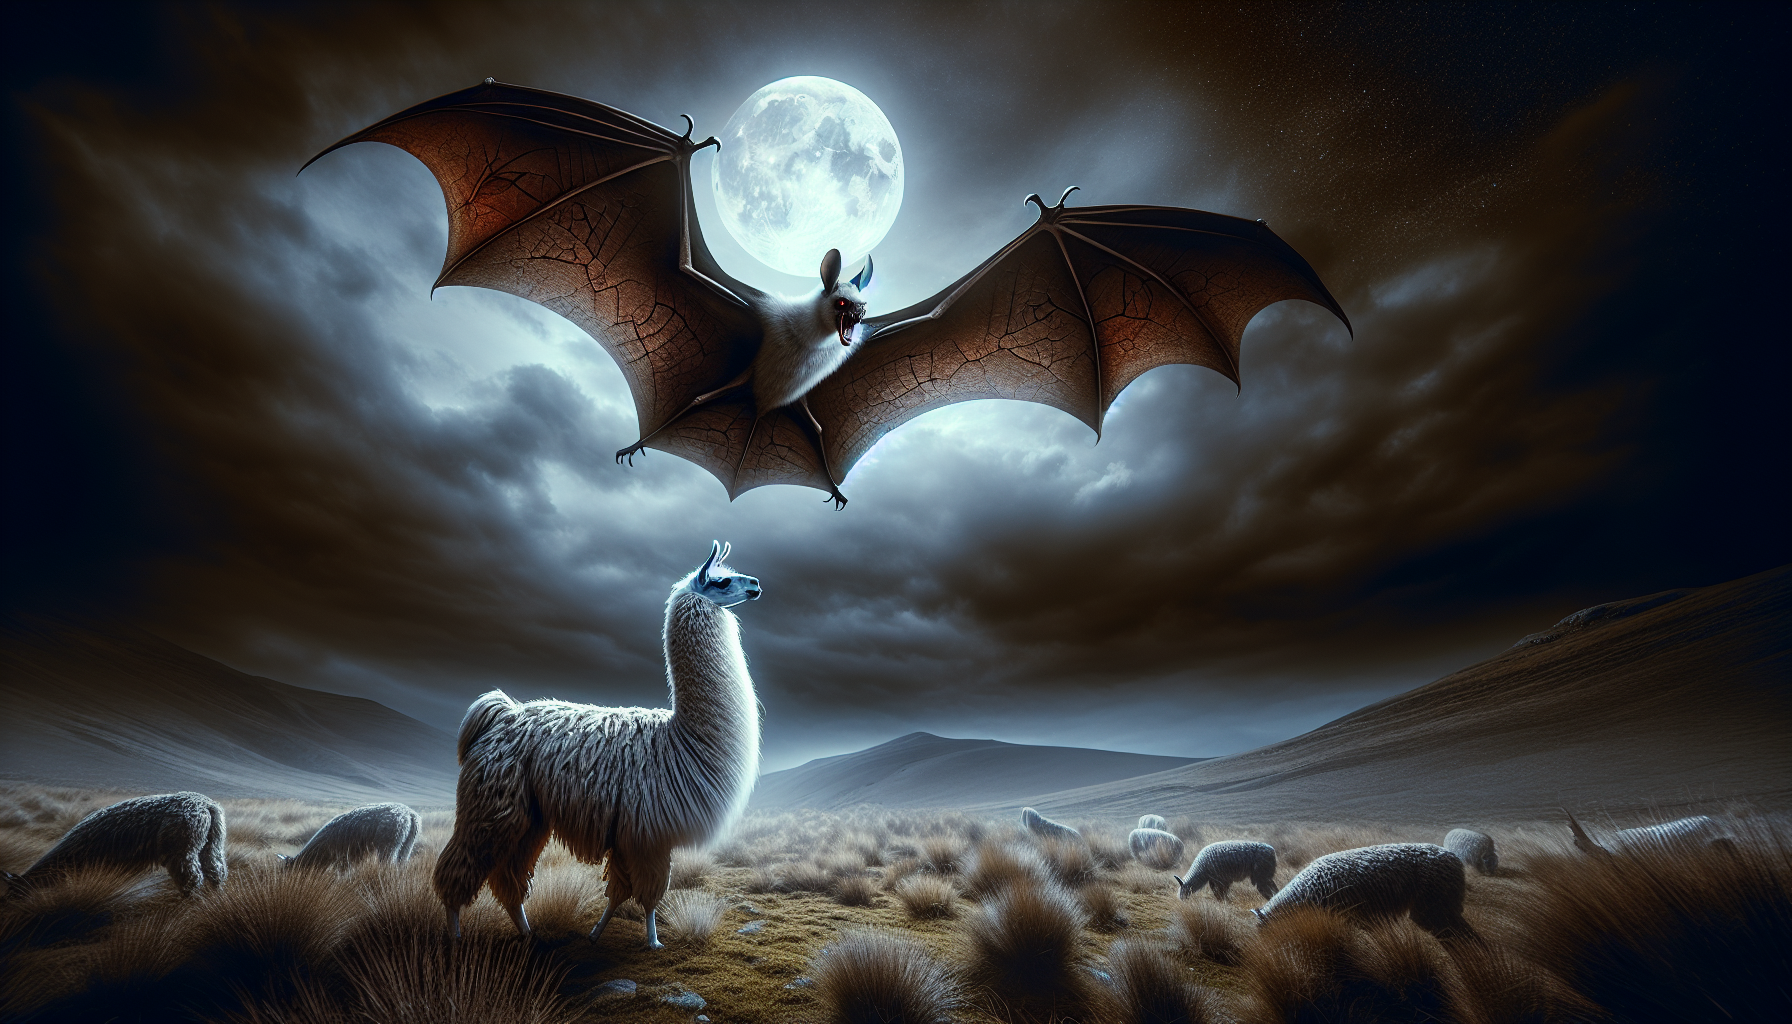

In [7]:
result = client.images.generate(
    model="Dalle3", # the name of your DALL-E 3 deployment
    prompt="Generate a wide aspect ratio image of a vampire bat attacking a llama",
    size="1792x1024",
    n=1
)

image_url = json.loads(result.model_dump_json())['data'][0]['url']
file_path=gen_filename()
file_path.parent.mkdir(parents=True, exist_ok=True)
urlretrieve(image_url, file_path)
images_paths.append(file_path)
Image(filename=file_path)